<a href="https://colab.research.google.com/github/prathibha-1234/Employee_Future_Prediction/blob/main/Employee_Future_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.simplefilter(action="ignore")

In [2]:
df = pd.read_csv("/content/Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [24]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
df["Education"].value_counts()

,count
Education,
Bachelors,3601
Masters,873
PHD,179


<Axes: xlabel='count', ylabel='Education'>

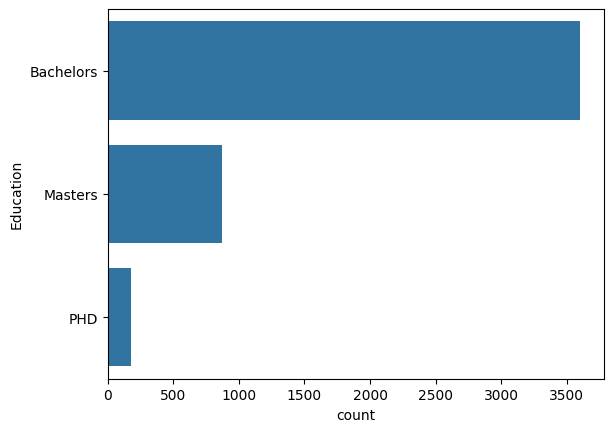

In [8]:
sns.countplot(df["Education"])


In [9]:
df["City"].value_counts()

,count
City,
Bangalore,2228
Pune,1268
New Delhi,1157


<Axes: xlabel='count', ylabel='City'>

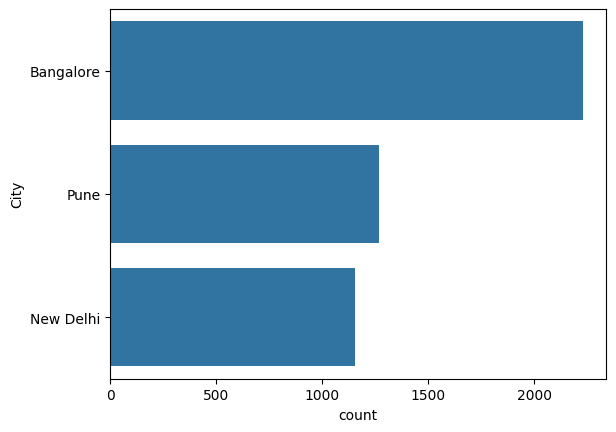

In [10]:

sns.countplot(df["City"])


<Axes: ylabel='count'>

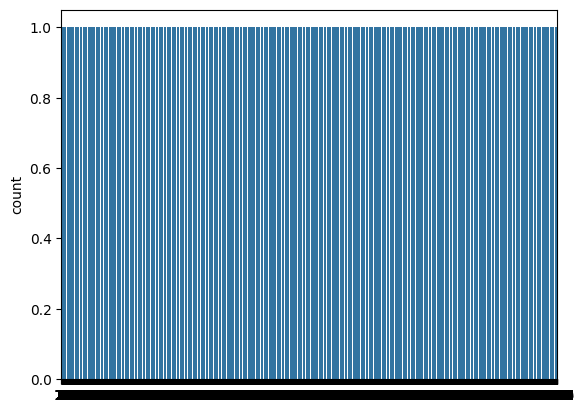

In [11]:
sns.countplot(df["JoiningYear"])

In [12]:
df["Gender"].value_counts()

,count
Gender,
Male,2778
Female,1875


<Axes: xlabel='count', ylabel='Gender'>

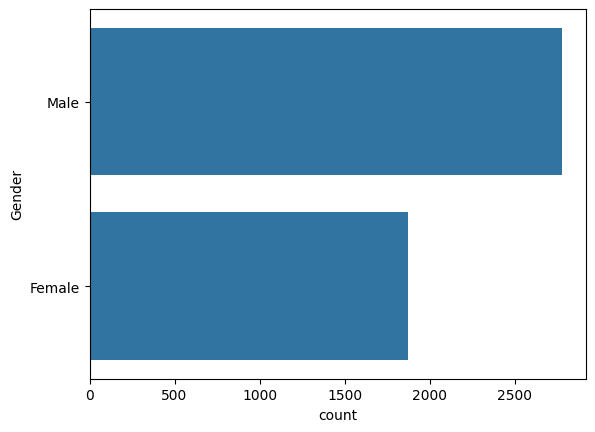

In [13]:
sns.countplot(df["Gender"])

In [14]:
df["LeaveOrNot"].value_counts()

,count
LeaveOrNot,
0,3053
1,1600


<Axes: ylabel='count'>

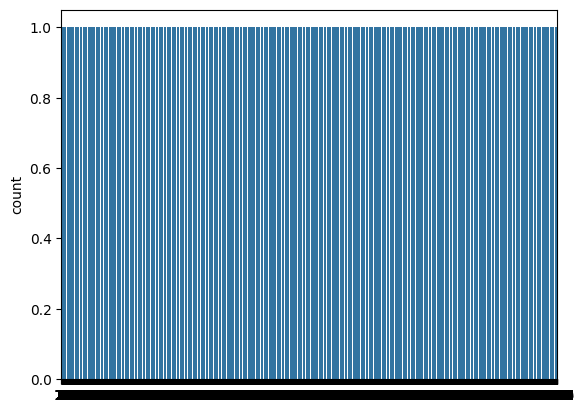

In [15]:
sns.countplot(df["LeaveOrNot"])

In [16]:

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [17]:
df = pd.get_dummies(df,["Education","City","Gender","EverBenched"])

In [18]:
df.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,True,False,False,True,False,False,False,True,True,False
1,2013,1,28,3,1,True,False,False,False,False,True,True,False,True,False
2,2014,3,38,2,0,True,False,False,False,True,False,True,False,True,False
3,2016,3,27,5,1,False,True,False,True,False,False,False,True,True,False
4,2017,3,24,2,1,False,True,False,False,False,True,False,True,False,True


In [45]:

X = df.drop(["LeaveOrNot"],axis =1)
y = df["LeaveOrNot"]

In [46]:
X.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,True,False,False,True,False,False,False,True,True,False
1,2013,1,28,3,True,False,False,False,False,True,True,False,True,False
2,2014,3,38,2,True,False,False,False,True,False,True,False,True,False
3,2016,3,27,5,False,True,False,True,False,False,False,True,True,False
4,2017,3,24,2,False,True,False,False,False,True,False,True,False,True


In [47]:
y.head()

,LeaveOrNot
0,0
1,1
2,0
3,1
4,1


In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [49]:
x_train.shape

(3722, 14)

In [50]:
x_test.shape

(931, 14)

In [51]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = lr.predict(x_test)
accuracy_score(y_pred,y_test)


0.7314715359828142

SVM


In [40]:
svm=SVC(kernel="poly")
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [41]:
y_pred=svm.predict(x_test)
accuracy_score(y_pred,y_test)

0.8818474758324383

Random Forest

In [54]:

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.8270676691729323

In [57]:

xb = XGBClassifier()
xb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1]:

y_pred = xb.predict(x_test)
accuracy_score(y_pred,y_test)

NameError: name 'xb' is not defined